In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from src.config import TRAIN_CSV, SUBSET_CSV, TRAIN_IMAGE_DIR, OUTPUT_DIR, TEST_CSV, TEST_IMAGE_DIR
from src.data_loader import load_dataset
from src.preprocessing import create_paired_subset
from src.model import build_unet
from src.evaluate import evaluate_all_best_models

import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [ ]:
# Starte den vollständigen Ablauf (inkl. Masken, Subset, Training)
# --- Einzelnes Modell trainieren"
#os.environ["MODE"] = "dropout"  # Auswahl für Modell treffen: "baseline", "dropout", "lowlr", "diceloss"
#!python pipeline.py

# --- Batch-Durchlauf Modell trainieren"
# Liste der Trainingsmodi
modes = ["baseline", "dropout", "lowlr", "diceloss"]

for mode in modes:
    os.environ["MODE"] = mode
    print("="*60)
    print(f"🚀 Starte Training für Modus: {mode.upper()}")
    print("="*60)
    
    # Starte den Pipeline-Prozess
    exit_code = os.system("python pipeline.py")
    
    if exit_code != 0:
        print(f"❌ Training für {mode} fehlgeschlagen (Exit-Code {exit_code})")
        break
    else:
        print(f"✅ Training für {mode} abgeschlossen\n")

In [7]:
#tensorboard
# 1️⃣ Einmalig Extension laden (nur nötig, wenn nicht bereits geladen)
%load_ext tensorboard

# 2️⃣ TensorBoard im Notebook starten
%tensorboard --logdir output/logs --reload_interval 5

In [6]:
#Tensor Board im Browser anzeigen
import webbrowser
from IPython.display import display, HTML

def open_tensorboard(port=6006):
    url = f"http://localhost:{port}"
    webbrowser.open(url)
    display(HTML(f'<a href="{url}" target="_blank"><button>📊 TensorBoard im Browser öffnen</button></a>'))

# Beispielaufruf
open_tensorboard()

In [13]:
from tensorflow.keras.models import load_model

paths = [
    "output/best_model_baseline.keras",
    "output/best_model_dropout.keras",
    "output/best_model_lowlr.keras",
    "output/best_model_diceloss.keras"
]

for path in paths:
    print(f"\n🔍 Summary of {path}")
    model = load_model(path, compile=False)
    model.summary()



🔍 Summary of output/best_model_baseline.keras


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ up_sampling2d[0]

 Total params: 31,378,945 (119.70 MB)

 Trainable params: 31,378,945 (119.70 MB)

 Non-trainable params: 0 (0.00 B)


🔍 Summary of output/best_model_dropout.keras


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_3[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ dropout_1[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ dropout_2[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ dropout_3[0][0] 

 Total params: 31,378,945 (119.70 MB)

 Trainable params: 31,378,945 (119.70 MB)

 Non-trainable params: 0 (0.00 B)


🔍 Summary of output/best_model_lowlr.keras


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ up_sampling2d[0]

 Total params: 31,378,945 (119.70 MB)

 Trainable params: 31,378,945 (119.70 MB)

 Non-trainable params: 0 (0.00 B)


🔍 Summary of output/best_model_diceloss.keras


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ up_sampling2d[0]

 Total params: 31,378,945 (119.70 MB)

 Trainable params: 31,378,945 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from src.evaluate import evaluate_model
from src.model import dice_score, iou_score, dice_loss

modes = ["baseline", "dropout", "lowlr", "diceloss"]

for mode in modes:
    path = f"output/best_model_{mode}.keras"
    print(f"\n📊 Evaluating original .keras model: {mode}")
    
    evaluate_model(
        model_path=path,
        csv_path=SUBSET_CSV,
        image_dir=TRAIN_IMAGE_DIR,
        target_size=(256, 256),
        n_examples=0
    )



📊 Evaluating original .keras model: baseline
📦 Lade Modell...
📥 Lade Testdaten...
📦 Geladen: 2000 Bilder mit Shape (2000, 256, 256, 3)
✅ Davon echte Segmentierungsmasken: 958
⚠️  Dummy-Masken: 1042
🔮 Berechne Vorhersagen...
63/63 ━━━━━━━━━━━━━━━━━━━━ 463s 7s/step
📊 Evaluationsergebnisse:
   - IoU (Jaccard Index): 0.9465
   - Dice Score:          0.9725
🖼️ Bilder geloggt unter: /Users/sabinewildemann/Documents/A_EGO/2_Studium/1_AI/1_Pruefungsleistung/output/logs/eval/eval_20250405-102616

📊 Evaluating original .keras model: dropout
📦 Lade Modell...
📥 Lade Testdaten...
📦 Geladen: 2000 Bilder mit Shape (2000, 256, 256, 3)
✅ Davon echte Segmentierungsmasken: 958
⚠️  Dummy-Masken: 1042
🔮 Berechne Vorhersagen...
42/63 ━━━━━━━━━━━━━━━━━━━━ 2:44 8s/step

📊 Starte automatische Evaluation...

📊 Starte Evaluation für BEST-MODEL: BASELINE


📦 Geladen: 2000 Bilder mit Shape (2000, 256, 256, 3)
✅ Davon echte Segmentierungsmasken: 958
⚠️  Dummy-Masken: 1042
63/63 ━━━━━━━━━━━━━━━━━━━━ 505s 8s/step


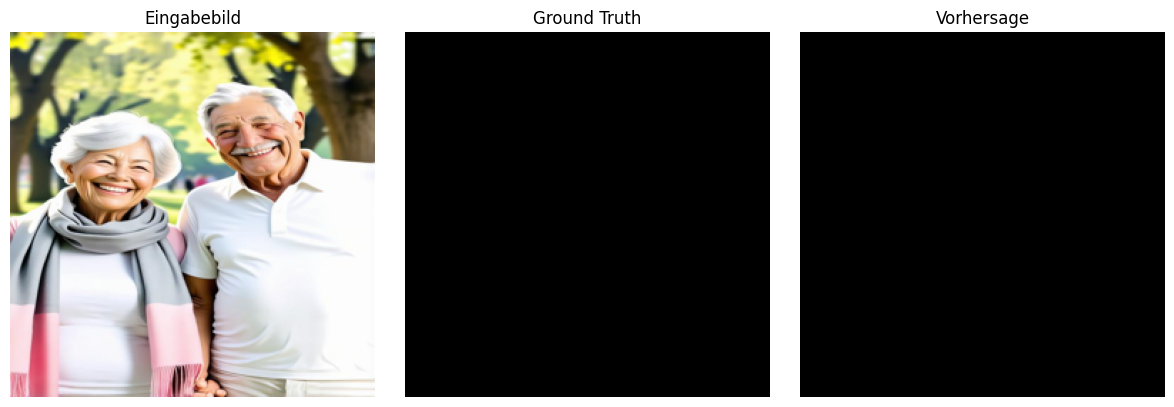

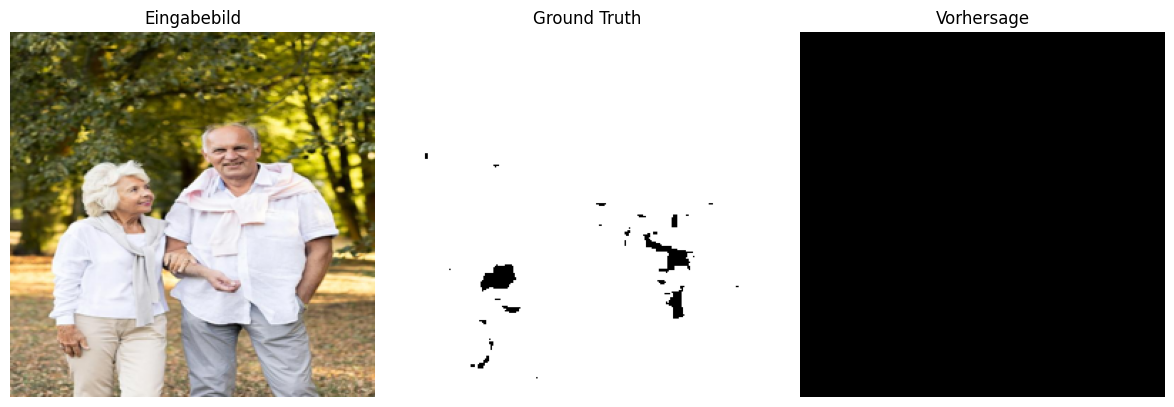

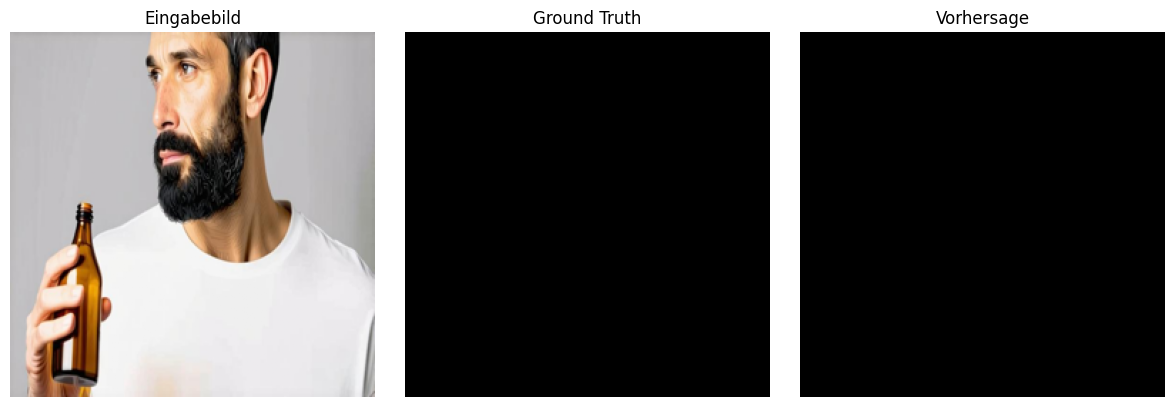


📊 Starte Evaluation für BEST-MODEL: DROPOUT
📦 Geladen: 2000 Bilder mit Shape (2000, 256, 256, 3)
✅ Davon echte Segmentierungsmasken: 958
⚠️  Dummy-Masken: 1042
63/63 ━━━━━━━━━━━━━━━━━━━━ 515s 8s/step


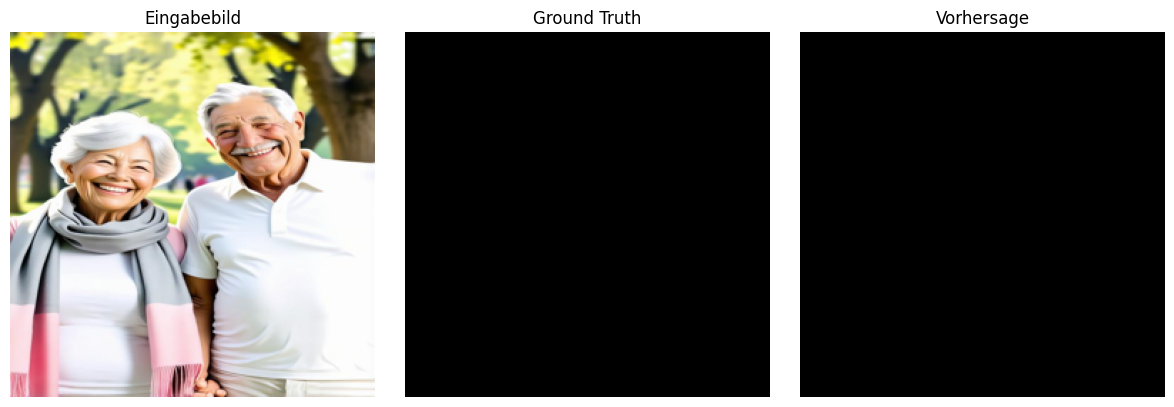

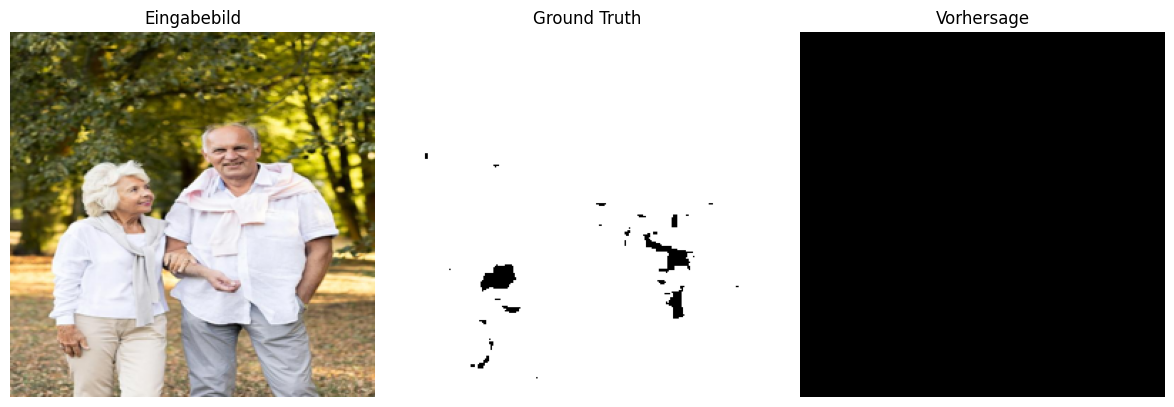

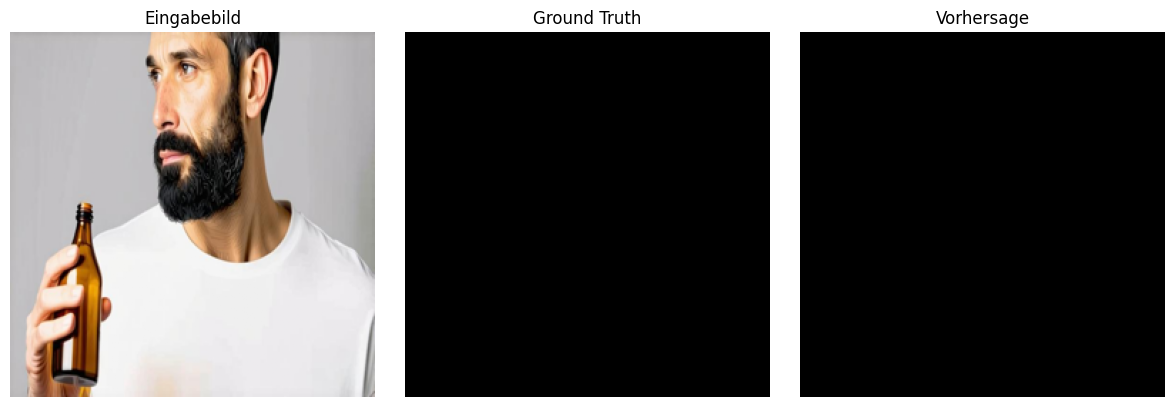


📊 Starte Evaluation für BEST-MODEL: LOWLR


📦 Geladen: 2000 Bilder mit Shape (2000, 256, 256, 3)
✅ Davon echte Segmentierungsmasken: 958
⚠️  Dummy-Masken: 1042
63/63 ━━━━━━━━━━━━━━━━━━━━ 514s 8s/step


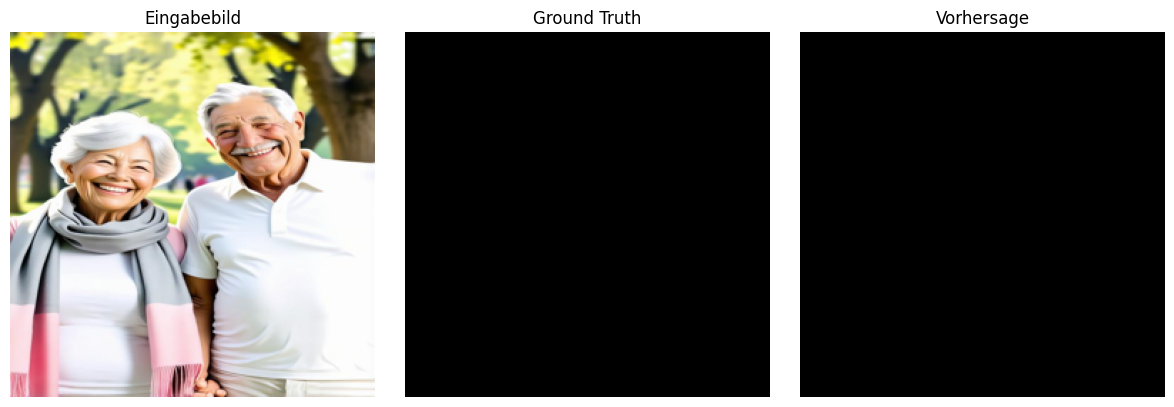

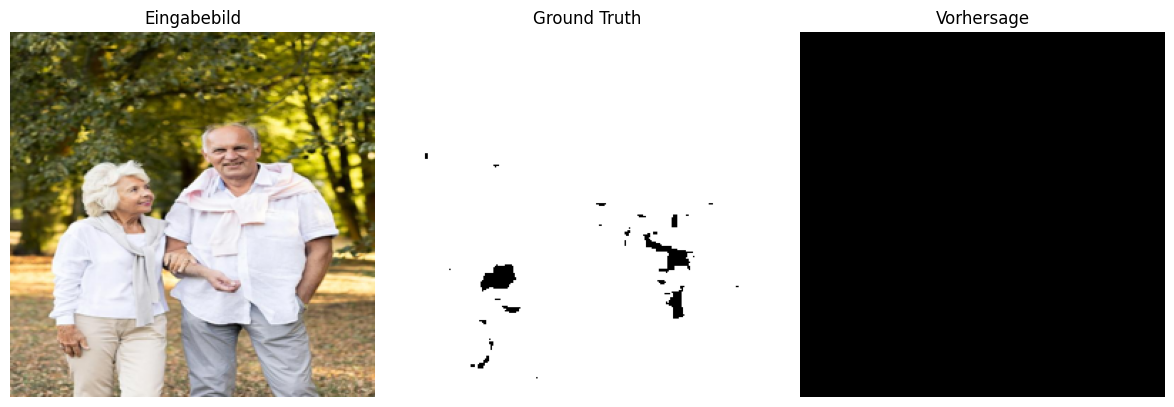

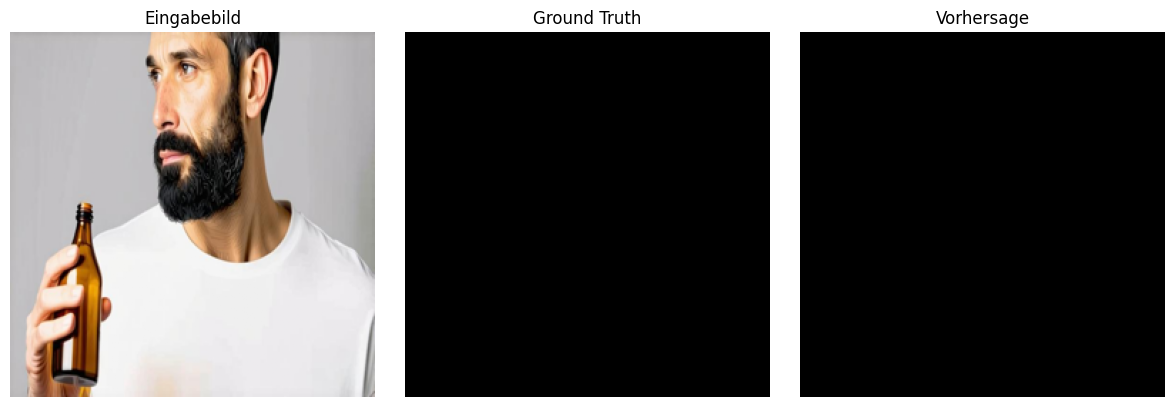


📊 Starte Evaluation für BEST-MODEL: DICELOSS


📦 Geladen: 2000 Bilder mit Shape (2000, 256, 256, 3)
✅ Davon echte Segmentierungsmasken: 958
⚠️  Dummy-Masken: 1042
63/63 ━━━━━━━━━━━━━━━━━━━━ 509s 8s/step


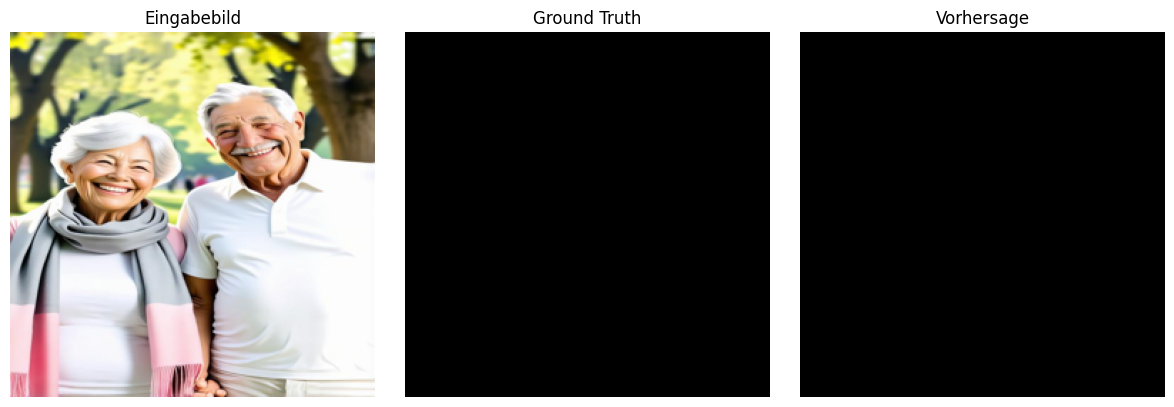

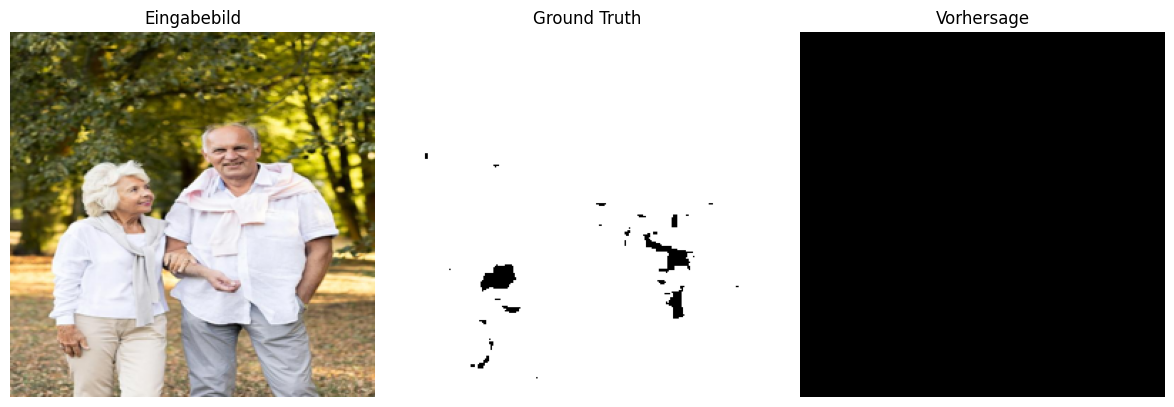

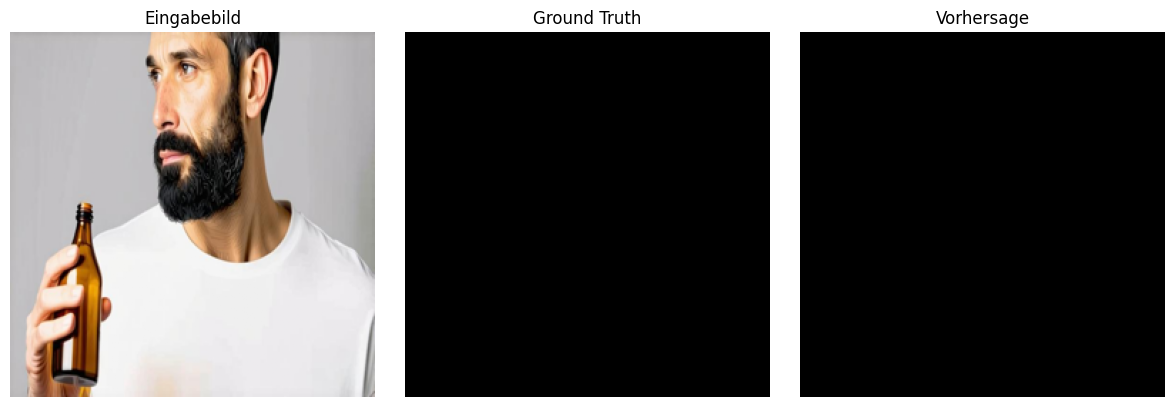


💾 Evaluation gespeichert unter: /Users/sabinewildemann/Documents/A_EGO/2_Studium/1_AI/1_Pruefungsleistung/output/evaluation_results.csv


In [2]:
# --- Evaluation nach dem Training ---
print("📊 Starte automatische Evaluation...")

evaluate_all_best_models()

In [4]:
import pandas as pd
import os
from src.config import OUTPUT_DIR

def show_evaluation_summary(filename="evaluation_results.csv"):
    path = os.path.join(OUTPUT_DIR, filename)
    if os.path.exists(path):
        df = pd.read_csv(path)
        print("📊 Vergleichstabelle:")
        display(df)
    else:
        print(f"❌ Datei nicht gefunden: {path}")
        
show_evaluation_summary()


📊 Vergleichstabelle:


,Modus,IoU,Dice Score
0,baseline,0.9465,0.9725
1,dropout,0.9465,0.9725
2,lowlr,0.9465,0.9725
3,diceloss,0.9465,0.9725


In [ ]:
# Für individuelle Abfragen, Trainingsdaten nach Experiment/MODE laden
# 📥 Trainingsdaten laden per Modus
X, y, df = load_training_data(mode=os.environ["MODE"])

In [ ]:
#Trainingsdaten laden per Modus
def load_training_data(mode="baseline", output_dir="output"):
    """Lädt gespeicherte Trainingsdaten (.npy, .pkl) für den angegebenen Modus."""
    print(f"📦 Lade Trainingsdaten im Modus: {mode}")
    X = np.load(os.path.join(output_dir, f"train_images_{mode}.npy"))
    y = np.load(os.path.join(output_dir, f"train_masks_{mode}.npy"))
    df = pd.read_pickle(os.path.join(output_dir, f"train_df_{mode}.pkl"))
    
    print(f"✅ Geladen: {X.shape[0]} Bilder, {y.shape[0]} Masken")
    return X, y, df

In [ ]:
# 🔄 Testdaten vorbereiten (nur für spätere Inferenz)
try:
    X_test, _ = load_dataset(csv_path=TEST_CSV, image_dir=TEST_IMAGE_DIR, unlabeled=True)
    np.save("output/test_images.npy", X_test)
    print("✅ Unlabeled Testdaten gespeichert.")
except Exception as e:
    print("⚠️ Testdaten konnten nicht geladen werden:", e)

In [5]:
#Metriken aus allen Modi nebeneinander anzeigen
def compare_models(modes=["baseline", "dropout", "lowlr"], target_size=(256, 256)):
    results = []

    for mode in modes:
        model_path = os.path.join(OUTPUT_DIR, f"unet_model_{mode}.keras")
        print(f"📦 Lade Modell: {model_path}")
        model = load_model(model_path)

        X, y_true = load_dataset(csv_path=SUBSET_CSV, image_dir=TRAIN_IMAGE_DIR, target_size=target_size)
        y_pred = model.predict(X)
        y_pred_bin = (y_pred > 0.5).astype(np.uint8)

        y_true_flat = y_true.reshape(-1)
        y_pred_flat = y_pred_bin.reshape(-1)

        iou = jaccard_score(y_true_flat, y_pred_flat)
        dice = f1_score(y_true_flat, y_pred_flat)

        results.append({"Modus": mode, "IoU": iou, "Dice": dice})

    df_results = pd.DataFrame(results)
    return df_results

compare_models()

📦 Lade Modell: /Users/sabinewildemann/Documents/A_EGO/2_Studium/1_AI/1_Pruefungsleistung/output/unet_model_baseline.keras


NameError: name 'load_model' is not defined

In [ ]:
#Start APP
MODE=baseline uvicorn api.app:app --reload
#MODE=dropout uvicorn api.app:app --reload
#MODE=lowlr uvicorn api.app:app --reload
#MODE=diceloss uvicorn api.app:app --reload